In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#droping PassengerId and Name as both are not helpfull in making model

In [7]:
df = df.drop('Name',axis=1)

In [8]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#age,Cabin and Embarked  has missing value

<AxesSubplot:>

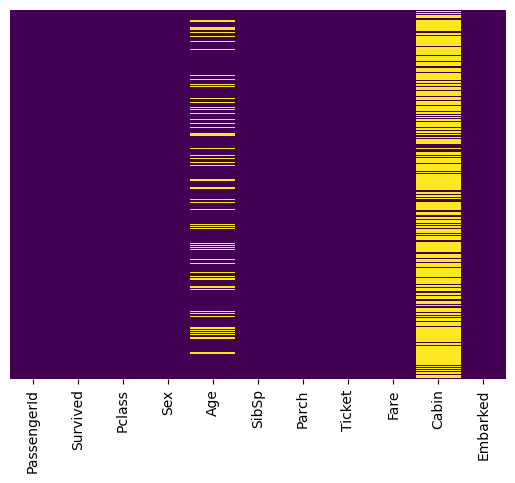

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

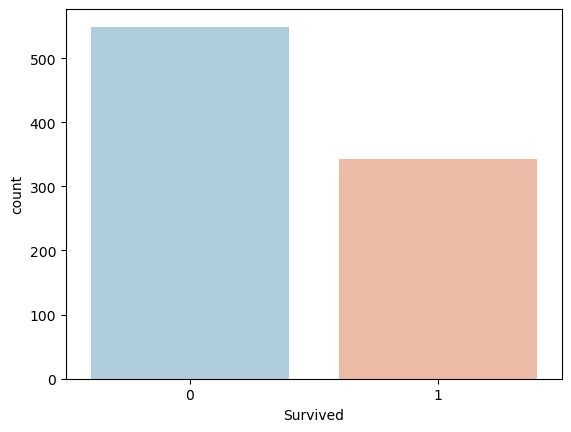

In [12]:
sns.countplot(x='Survived',data=df,palette='RdBu_r')

In [13]:
#data shows that non survvers are more then survivors

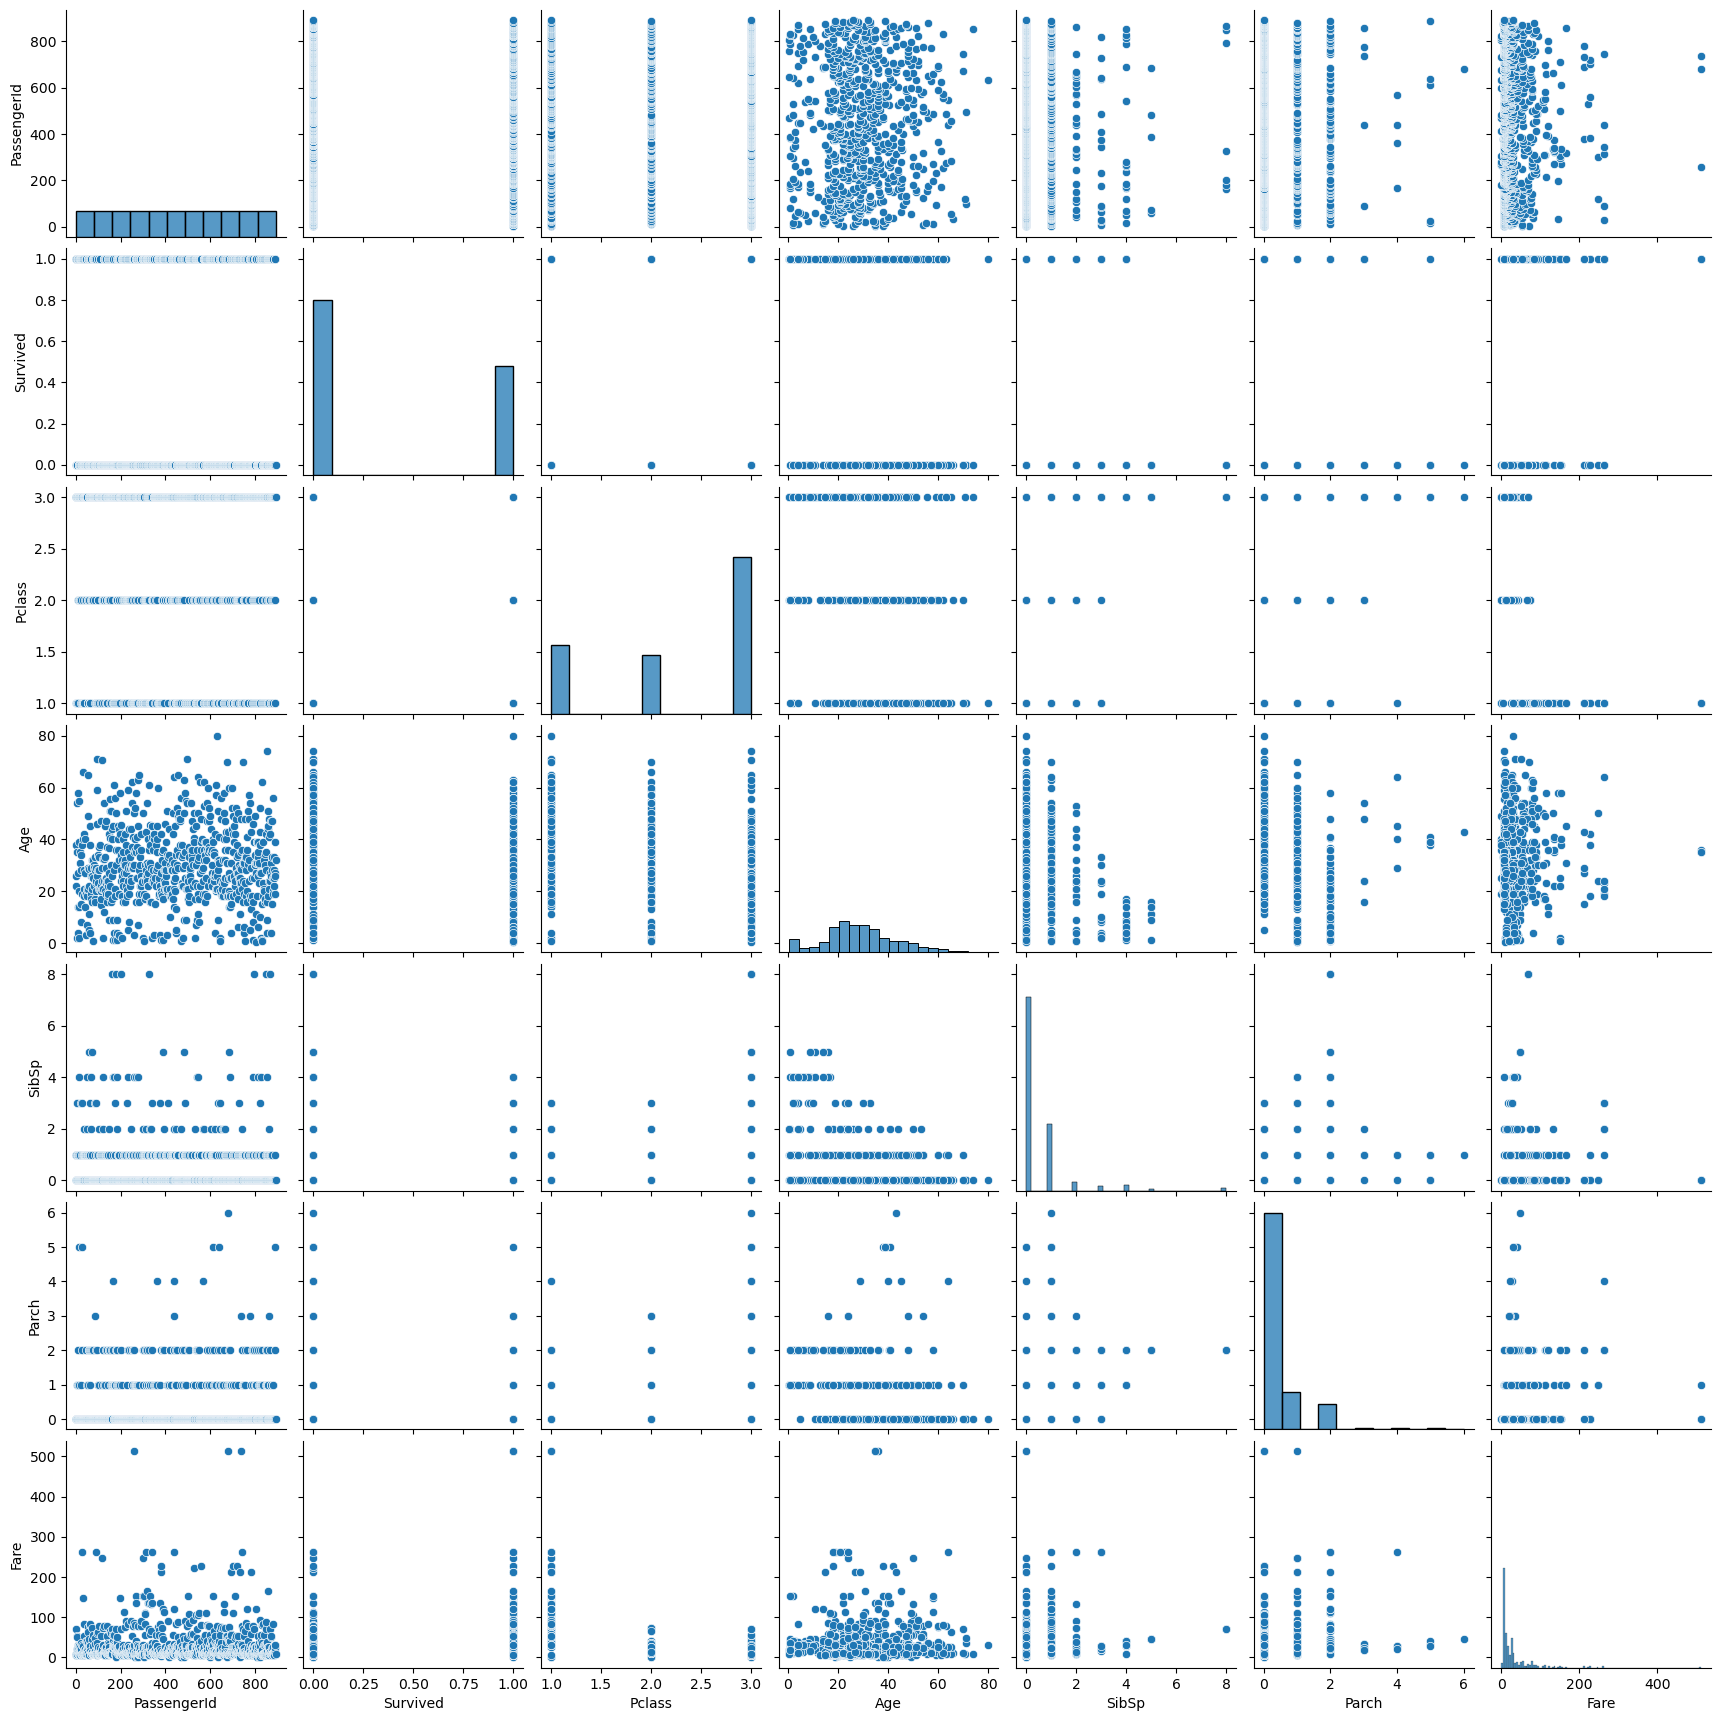

In [14]:
sns.pairplot(df)

<AxesSubplot:>

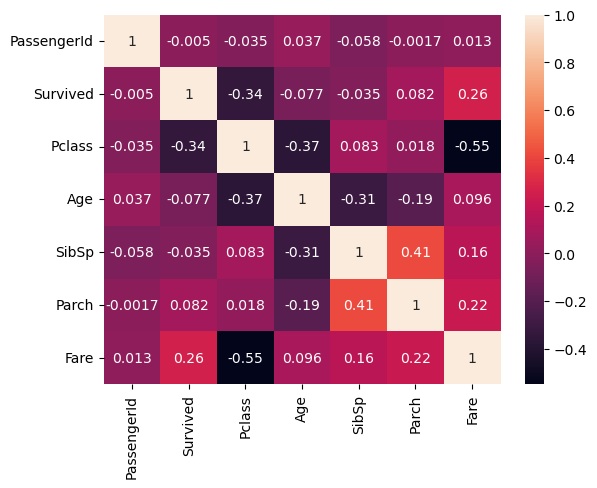

In [15]:
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df['Cabin'].isnull().sum()

687

In [18]:
#in the total 891 no of data 687 missing valu - s lets drop it as it can not help 

In [19]:
df = df.drop('Cabin',axis=1)

In [20]:
df['Embarked'].isnull().sum()

2

In [21]:
df['Age'].isnull().sum()

177

In [22]:
#lets fill the value for age and Embarked

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

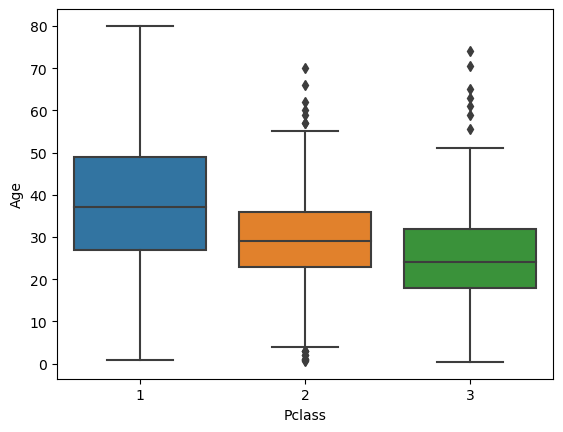

In [23]:
sns.boxplot(x= 'Pclass', y= 'Age',  data = df)

In [24]:
# as we can see accoding to age people took the class younger has less class

In [25]:
#lets fill the data

In [26]:
def made_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 43
        if Pclass == 2:
            return 35
        else:
            return 27
    else:
        return Age
        

In [27]:
df['Age'] = df[['Age','Pclass']].apply(made_age,axis=1)

<AxesSubplot:>

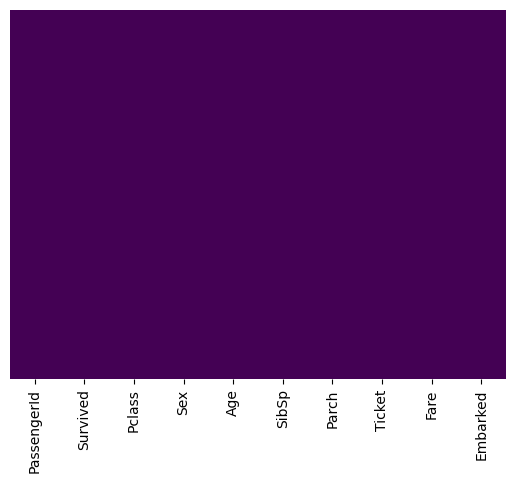

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
df['Embarked'].isnull().sum()

2

In [30]:
#still have 2 missing data in Embarked


In [31]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
#filling Embarked wth mode option

In [33]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [34]:
df = df.fillna('S')

In [35]:
df['Embarked'].isnull().sum()

0

In [36]:
#as we dont hve any null value lets encode the deta

In [37]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,27.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [39]:
#lets make passanger id the index, and srop ticket as there is no relation and all ticket is diffrent

In [40]:
df.set_index('PassengerId', inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S
889,0,3,female,27.0,1,2,W./C. 6607,23.4500,S


In [41]:
df = df.drop('Ticket', axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [43]:
#Sex ,  Embarked  eeds o be encoded

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
LA = LabelEncoder()

In [46]:
df['Embarked'] = LA.fit_transform(df['Embarked'])
df['Sex'] = LA.fit_transform(df['Sex'])

In [47]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,27.0,1,2,23.4500,2


<AxesSubplot:>

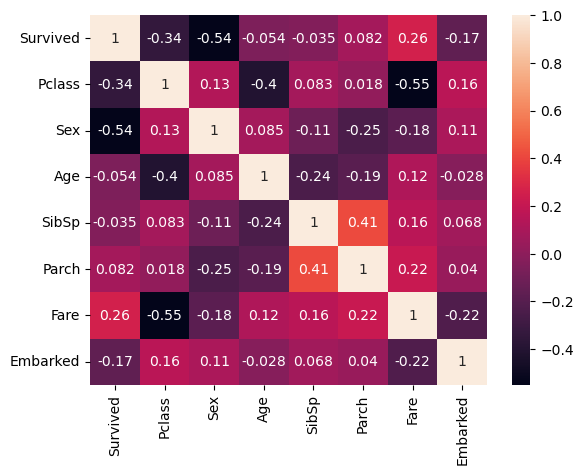

In [48]:
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [49]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.417884
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

<AxesSubplot:>

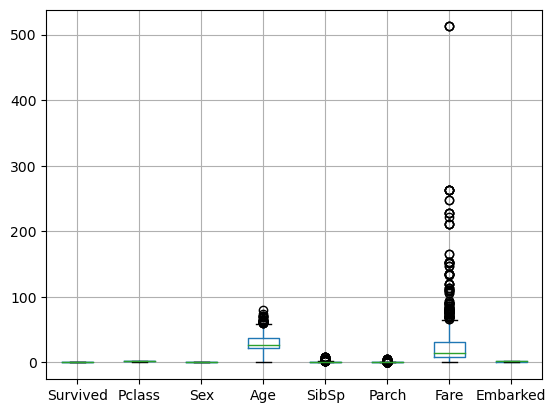

In [50]:
df.boxplot()

In [51]:
#data has skewness ans outliers

In [52]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

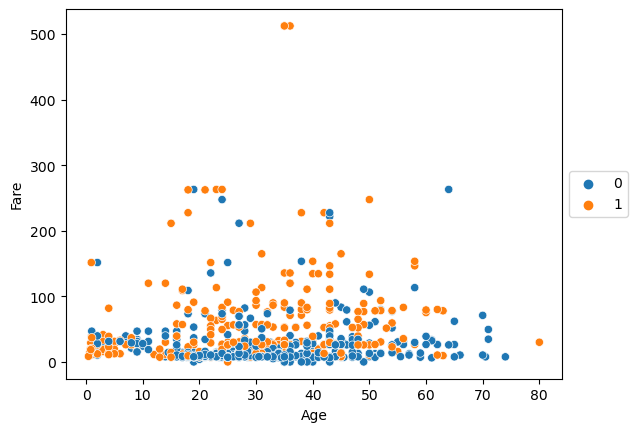

In [53]:
sns.scatterplot( x='Age',y='Fare',hue='Survived',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [54]:
#data shows whos fare is more survived more

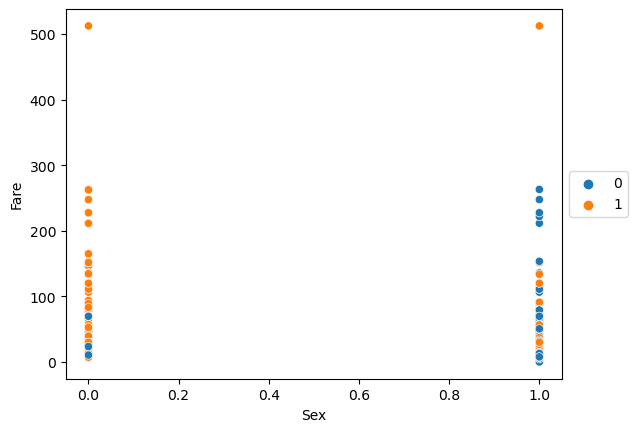

In [55]:
sns.scatterplot( x='Sex',y='Fare',hue='Survived',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [56]:
#data shows femil survived more

In [57]:
#lets build the model

In [58]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [59]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [62]:
Scaler =  StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

In [63]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
accuracy_score(y_test,predictions)

0.8271186440677966

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       175
           1       0.83      0.72      0.77       120

    accuracy                           0.83       295
   macro avg       0.83      0.81      0.82       295
weighted avg       0.83      0.83      0.82       295



In [68]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print('max acc is',maxaccu,'on r state',maxrs)

max acc is 0.8711864406779661 on r state 150


In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=maxrs)

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [71]:
predictions = logmodel.predict(X_test)

In [75]:
accuracy_score(y_test,predictions)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       176
           1       0.88      0.79      0.83       119

    accuracy                           0.87       295
   macro avg       0.87      0.86      0.86       295
weighted avg       0.87      0.87      0.87       295

[[163  13]
 [ 25  94]]


In [74]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78       176
           1       0.78      0.29      0.43       119

    accuracy                           0.68       295
   macro avg       0.72      0.62      0.60       295
weighted avg       0.71      0.68      0.64       295

[[166  10]
 [ 84  35]]


In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier()
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
accuracy_score(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       176
           1       0.69      0.57      0.62       119

    accuracy                           0.72       295
   macro avg       0.71      0.70      0.70       295
weighted avg       0.72      0.72      0.72       295

[[145  31]
 [ 51  68]]


In [79]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
accuracy_score(y_test,y_pred2 )
print(classification_report(y_test,y_pred2 ))
print(confusion_matrix(y_test,y_pred2 ))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       176
           1       0.74      0.72      0.73       119

    accuracy                           0.78       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.78      0.78      0.78       295

[[145  31]
 [ 33  86]]


In [80]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
accuracy_score(y_test,y_pred3 )
print(classification_report(y_test,y_pred3 ))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       176
           1       0.84      0.76      0.80       119

    accuracy                           0.84       295
   macro avg       0.84      0.83      0.84       295
weighted avg       0.84      0.84      0.84       295

[[159  17]
 [ 29  90]]


In [83]:
from sklearn.ensemble import GradientBoostingClassifier
classifier4 = GradientBoostingClassifier()
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)
accuracy_score(y_test, y_pred4)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[164  12]
 [ 29  90]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       176
           1       0.88      0.76      0.81       119

    accuracy                           0.86       295
   macro avg       0.87      0.84      0.85       295
weighted avg       0.86      0.86      0.86       295



In [88]:
classifier3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [85]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [89]:
grid_search = GridSearchCV(classifier3, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [90]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)


In [94]:
auc_value = auc(fpr, tpr)


In [95]:
print("Best Hyperparameters:", best_params)
print("AUC:", auc_value)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
AUC: 0.8298558059587472


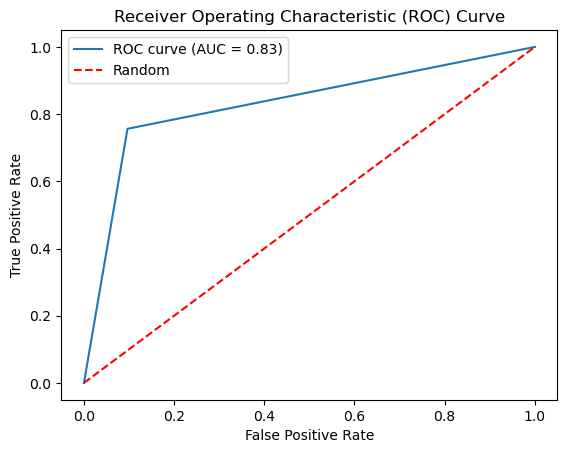

In [96]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [97]:
md = pd.DataFrame({'all m':['logmodel','classifier','classifier1','classifier2','classifier3','classifier4'],
             'ac score' :[accuracy_score(y_test,predictions)*100,
                         accuracy_score(y_test, y_pred)*100,
                         accuracy_score(y_test, y_pred1)*100,
                         accuracy_score(y_test, y_pred2)*100,
                         accuracy_score(y_test, y_pred3)*100,
                         accuracy_score(y_test, y_pred4)*100]})

<AxesSubplot:xlabel='all m', ylabel='ac score'>

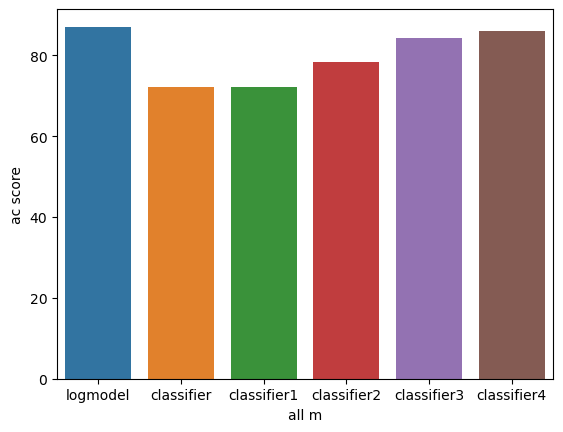

In [98]:
sns.barplot(md['all m'],md['ac score'])

In [99]:
import joblib

In [100]:
joblib.dump(logmodel,'titan')

['titan']

In [ ]:
#logmodel is best fit model for this data
#did not copy any code but did take help of many websites like sklearn, chatgpt, youtube, google and many more done by my self only